### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [342]:
data = pd.read_csv('data/coupons.csv')

In [343]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [444]:
data.isnull().sum()
data['income'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  int64 
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  int64 
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [415]:
# Instead of dropping null values, give them some numeric values with in the range
data['car'].fillna("No car", inplace=True)
data['Bar'].fillna(0, inplace=True)
data['CoffeeHouse'].fillna(0, inplace=True)
data['CarryAway'].fillna(0, inplace=True)
data['RestaurantLessThan20'].fillna(0, inplace=True)
data['Restaurant20To50'].fillna(0, inplace=True)
data = data.replace({'Bar': {'never': 0,'less1': 0,'1~3': 2, 'gt8' : 10 , '4~8': 7}})
data = data.replace({'CoffeeHouse': {'never': 0,'less1': 0,'1~3': 2, 'gt8' : 10 , '4~8': 7}})
data = data.replace({'CarryAway': {'never': 0,'less1': 0,'1~3': 2, 'gt8' : 10 , '4~8': 7}})
data = data.replace({'RestaurantLessThan20': {'never': 0,'less1': 0,'1~3': 2, 'gt8' : 10 , '4~8': 7}})
data = data.replace({'Restaurant20To50': {'never': 0,'less1': 0,'1~3': 2, 'gt8' : 10 , '4~8': 7}})
data = data.replace({'age': {'50plus': 55,'below21': 18, '21': 21, '46' : 46, '26': 26, '31' : 31, '41': 41, '36': 36 }})
data = data.replace({'expiration': {'1d': 24,'2h': 2,}})
data = data.replace({'income': {'$37500 - $49999': 45000, '$62500 - $74999': 70000,'$12500 - $24999': 20000,'$75000 - $87499': 85000, '$50000 - $62499': 56000, '$25000 - $37499': 32000,'$100000 or More': 105000,'$87500 - $99999': 92000,'Less than $12500': 10000}})
data.astype({'CoffeeHouse': 'int64','Bar': 'int64','CarryAway': 'int64','RestaurantLessThan20': 'int64','Restaurant20To50': 'int64','age': 'int64','expiration':'int64','income':'int64'}).dtypes
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [430]:
proportion = data.query("Y==1")['Y'].count()/data['Y'].count()
proportion
# 56 percent

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

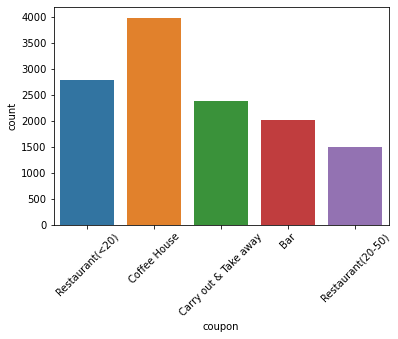

In [348]:
sns.countplot(data=data, x= 'coupon')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

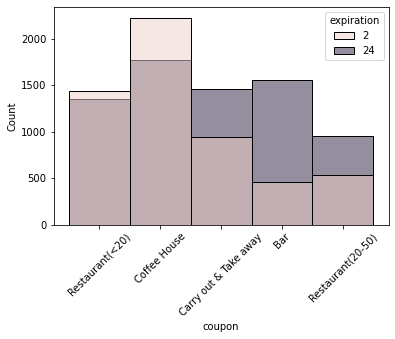

In [349]:
sns.histplot(data=data,x='coupon', hue='expiration')
plt.xticks(rotation=45);

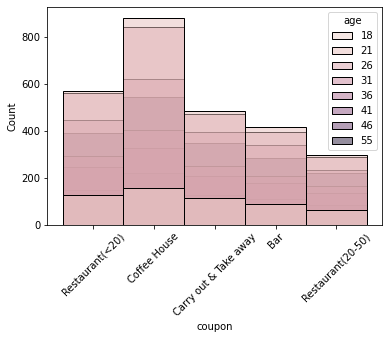

In [350]:
sns.histplot(data=data,x='coupon', hue='age')
plt.xticks(rotation=45);

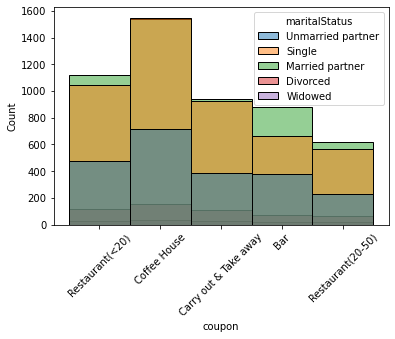

In [351]:
sns.histplot(data=data,x='coupon', hue='maritalStatus')
plt.xticks(rotation=45);

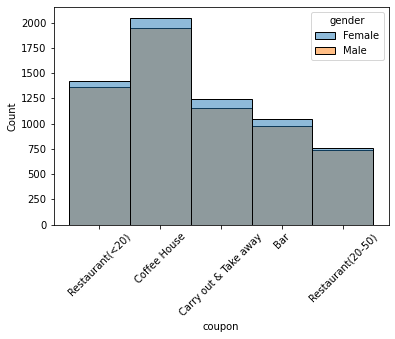

In [375]:
sns.histplot(data=data,x='coupon', hue='gender');
plt.xticks(rotation=45);


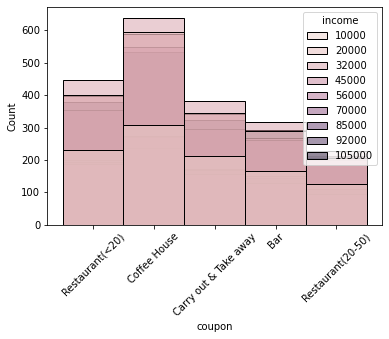

In [353]:
sns.histplot(data=data,x='coupon', hue='income')
plt.xticks(rotation=45);

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [354]:
bar_coupon_data = data.query("coupon == 'Bar'")
bar_coupon_data['Y'].describe()


count    2017.000000
mean        0.410015
std         0.491958
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Y, dtype: float64

2. What proportion of bar coupons were accepted?


In [355]:
prop_bar_coupon = bar_coupon_data.query("Y==1")['Y'].count()/bar_coupon_data['Y'].count()
prop_bar_coupon
# 41 percent

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [356]:
prop1_bar_coupon = bar_coupon_data.query("Y==1 & Bar <= 3")['Y'].count()/bar_coupon_data['Y'].count()
prop2_bar_coupon = bar_coupon_data.query("Y==1 & Bar > 3")['Y'].count()/bar_coupon_data['Y'].count()
print('Percentage of drivers, who visited a Bar Less than 3 times and accepted the coupon', prop1_bar_coupon);
print('Percentage of drivers, who visited a Bar More than 3 times and accepted the coupon', prop2_bar_coupon);
print('Drivers, who visited a Bar 3 or fewer times a month accepted coupons more!');

Percentage of drivers, who visited a Bar Less than 3 times and accepted the coupon 0.3341596430342092
Percentage of drivers, who visited a Bar More than 3 times and accepted the coupon 0.07585523054040655
Drivers, who visited a Bar 3 or fewer times a month accepted coupons more!


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [357]:
prop3_bar_coupon = bar_coupon_data.query("Y==1 & Bar > 1 & age > 25")['Y'].count()/bar_coupon_data['Y'].count()
prop4_bar_coupon = bar_coupon_data.query("Y==1 & Bar < 1 & age < 25")['Y'].count()/bar_coupon_data['Y'].count()
print(prop3_bar_coupon,prop4_bar_coupon)
print('Coupon acceptance rate of drivers, who visited Bar More than 1 time a month and are over the age of 25: ', prop3_bar_coupon);
print('Coupon acceptance rate of drivers, to all other criteria: ', prop4_bar_coupon);
print('Acceptence rate is higher among the drivers who go to a bar more than once a month and are over the age of 25!')


0.14476945959345563 0.06395637084779375
Coupon acceptance rate of drivers, who visited Bar Less than 1 time a month and are over the age of 25:  0.14476945959345563
Coupon acceptance rate of drivers, to all other criteria:  0.06395637084779375
Acceptence rate is higher among the drivers who go to a bar more than once a month and are over the age of 25!


5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [358]:
print('Null Hypothesis: Means of drivers who go to a bar more than once a month and are over the age of 25 is equal to the others ')
print('Alternate Hypothesis: Means are not equal')
null_df_series = bar_coupon_data.query("Bar > 1 & age > 25")['Y']
alt_df_series  = bar_coupon_data.query("Bar < 1 & age < 25")['Y']
tscore, pvalue = ttest_ind(null_df_series,alt_df_series, equal_var=True )

print('tscore for our two Hypothesis ', tscore)
print('pvalue for our two Hypothesis ', pvalue)

Null Hypothesis: Means of drivers who go to a bar more than once a month and are over the age of 25 is equal to the others 
Alternate Hypothesis: Means are not equal
tscore for our two Hypothesis  8.654024643358403
pvalue for our two Hypothesis  3.038189734783712e-17


6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [359]:
print('As the above pvalue: 3.038 is greater than 0.05, we fail to reject the Null Hypothesis')

As the above pvalue: 3.038 is greater than 0.05, we fail to reject the Null Hypothesis


7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [360]:
print('Null Hypothesis: Means of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is equal to the others ')
print('Alternate Hypothesis: Means are not equal')
null_df_series = bar_coupon_data.query("Bar > 1 & passanger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry' ")['Y']
alt_df_series  = bar_coupon_data.query("Bar < 1 & passanger == 'Kid(s)' & occupation == 'Farming Fishing & Forestry' ")['Y']

tscore, pvalue = ttest_ind(null_df_series,alt_df_series, equal_var=True)
print('tscore for our two Hypothesis ', tscore)
print('pvalue for our two Hypothesis ', pvalue)
print('As the above pvalue: 0.148 is greater than 0.05, we fail to reject the Null Hypothesis')

Null Hypothesis: Means of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is equal to the others 
Alternate Hypothesis: Means are not equal
tscore for our two Hypothesis  1.4481316568898581
pvalue for our two Hypothesis  0.1481479741857574
As the above pvalue: 0.148 is greater than 0.05, we fail to reject the Null Hypothesis


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [437]:
prop5_bar_coupon = bar_coupon_data.query("Y==1 & Bar > 1 & passanger != 'Kid(s)' & maritalStatus != 'Widowed' ")['Y'].count()/bar_coupon_data['Y'].count()
prop6_bar_coupon = bar_coupon_data.query("Y==1 & Bar > 1 & age < 30 ")['Y'].count()/bar_coupon_data['Y'].count()
prop7_bar_coupon = bar_coupon_data.query("Y==1 & RestaurantLessThan20 > 4 & income < 50000")['Y'].count()/bar_coupon_data['Y'].count()

print(prop5_bar_coupon,prop6_bar_coupon,prop7_bar_coupon)
print('Highest acceptance rate is by drivers who go to Bars more than once a month, had passengers that were not a kid, and were not widowed');

0.19484382746653445 0.12345066931085771 0.07734258800198314
Highest acceptance rate is by drivers who go to Bars more than once a month, had passengers that were not a kid, and were not widowed


9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [433]:

group_by = bar_coupon_data.query("Y==1 & passanger != 'Alone'").groupby(['passanger'])[['Y']].count()
group_by = group_by.reset_index()
group_by.loc[group_by['Y'].idxmax()]

print('Passengers who are friends to the drivers accepted more bar coupons');
print('Null Hypothesis: Passengers who are friends to the drivers and others passengers coupon acceptence means are equal (no difference in acceptence of coupons)')
null = bar_coupon_data.query("passanger != 'Alone'")['Y']
alt  = bar_coupon_data.query("passanger not in ['Alone','Friend(s)']")['Y']

tscore, pvalue = ttest_ind(null,alt, equal_var=True)
print('tscore for our two Hypothesis ', tscore)
print('pvalue for our two Hypothesis ', pvalue)

print('Since pvalue  less than 0.05, hence we reject null hypothesis and state: Passengers who are friends to the drivers accepted more bar coupons' )

Passengers who are friends to the drivers accepted more bar coupons
Null Hypothesis: Passengers who are friends to the drivers and others passengers coupon acceptence means are equal (no difference in acceptence of coupons)
tscore for our two Hypothesis  3.648555317909137
pvalue for our two Hypothesis  0.0002741998126054808
Since pvalue  less than 0.05, hence we reject null hypothesis and state: Passengers who are friends to the drivers accepted more bar coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [445]:
coffee_house_coupon_data = data.query("coupon == 'Coffee House'")
prop1_bar_coupon = coffee_house_coupon_data.query("Y==1 & CoffeeHouse <= 3")['Y'].count()/coffee_house_coupon_data['Y'].count()
prop2_bar_coupon = coffee_house_coupon_data.query("Y==1 & CoffeeHouse > 3")['Y'].count()/coffee_house_coupon_data['Y'].count()
print('Percentage of drivers, who visited a CoffeeHouse Less than 3 times and accepted the coupon', prop1_bar_coupon);
print('Percentage of drivers, who visited a CoffeeHouse More than 3 times and accepted the coupon', prop2_bar_coupon);
print('Drivers, who visited a CoffeeHouse 3 or fewer times a month accepted coupons more!');

Percentage of drivers, who visited a CoffeeHouse Less than 3 times and accepted the coupon 0.3506006006006006
Percentage of drivers, who visited a CoffeeHouse More than 3 times and accepted the coupon 0.14864864864864866
Drivers, who visited a CoffeeHouse 3 or fewer times a month accepted coupons more!


In [446]:
prop3_bar_coupon = coffee_house_coupon_data.query("Y==1 & CoffeeHouse > 1 & age > 25")['Y'].count()/coffee_house_coupon_data['Y'].count()
prop4_bar_coupon = coffee_house_coupon_data.query("Y==1 & CoffeeHouse < 1 & age < 25")['Y'].count()/coffee_house_coupon_data['Y'].count()
print('Coupon acceptance rate of drivers, who visited CoffeeHouse More than 1 time a month and are over the age of 25: ', prop3_bar_coupon);
print('Coupon acceptance rate of drivers, to all other criteria: ', prop4_bar_coupon);
print('Acceptence rate is higher among the drivers who visited a CoffeeHouse more than once a month and are over the age of 25!')


Coupon acceptance rate of drivers, who visited CoffeeHouse More than 1 time a month and are over the age of 25:  0.21696696696696696
Coupon acceptance rate of drivers, to all other criteria:  0.04229229229229229
Acceptence rate is higher among the drivers who visited a CoffeeHouse more than once a month and are over the age of 25!


In [447]:
print('Null Hypothesis: Means of drivers who go to a CoffeeHouse more than once a month and are over the age of 25 is equal to the others ')
print('Alternate Hypothesis: Means are not equal')
null_df_series = coffee_house_coupon_data.query("CoffeeHouse > 1 & age > 25")['Y']
alt_df_series  = coffee_house_coupon_data.query("CoffeeHouse < 1 & age < 25")['Y']
tscore, pvalue = ttest_ind(null_df_series,alt_df_series, equal_var=True )

print('tscore for our two Hypothesis ', tscore)
print('pvalue for our two Hypothesis ', pvalue)
print('As the above pvalue: 2.65 is greater than 0.05, we fail to reject the Null Hypothesis')

Null Hypothesis: Means of drivers who go to a CoffeeHouse more than once a month and are over the age of 25 is equal to the others 
Alternate Hypothesis: Means are not equal
tscore for our two Hypothesis  11.000859150033513
pvalue for our two Hypothesis  2.6566924929994746e-27
As the above pvalue: 0.35 is greater than 0.05, we fail to reject the Null Hypothesis


In [448]:
print('Null Hypothesis: Means of drivers who go to CoffeeHouse more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is equal to the others ')
print('Alternate Hypothesis: Means are not equal')
null_df_series = coffee_house_coupon_data.query("CoffeeHouse > 1 & passanger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry' ")['Y']
alt_df_series  = coffee_house_coupon_data.query("CoffeeHouse < 1 & passanger == 'Kid(s)' & occupation == 'Farming Fishing & Forestry' ")['Y']

tscore, pvalue = ttest_ind(null_df_series,alt_df_series, equal_var=True)
print('tscore for our two Hypothesis ', tscore)
print('pvalue for our two Hypothesis ', pvalue)
print('As the above pvalue: 0.58 is greater than 0.05, we fail to reject the Null Hypothesis')

Null Hypothesis: Means of drivers who go to CoffeeHouse more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is equal to the others 
Alternate Hypothesis: Means are not equal
tscore for our two Hypothesis  -0.021494540552551327
pvalue for our two Hypothesis  0.9828535224324567
As the above pvalue: 0.58 is greater than 0.05, we fail to reject the Null Hypothesis


In [449]:
prop5_bar_coupon = coffee_house_coupon_data.query("Y==1 & CoffeeHouse > 1 & passanger != 'Kid(s)' & maritalStatus != 'Widowed' ")['Y'].count()/bar_coupon_data['Y'].count()
prop6_bar_coupon = coffee_house_coupon_data.query("Y==1 & CoffeeHouse > 1 & age < 30 ")['Y'].count()/bar_coupon_data['Y'].count()
prop7_bar_coupon = coffee_house_coupon_data.query("Y==1 & RestaurantLessThan20 > 4 & income < 50000")['Y'].count()/bar_coupon_data['Y'].count()

print('Compare the acceptance rates between those passengers who:');
print(' Acceptance rate of drivers who go to CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed: ',prop5_bar_coupon);
print(' Acceptance rate of drivers who go to CoffeeHouse more than once a month and are under the age of 30: ',prop6_bar_coupon);
print('  Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: ',prop7_bar_coupon);

print(' High acceptence rate is by drivers who go to CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed')


Compare the acceptance rates between those passengers who:
 Acceptance rate of drivers who go to CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed:  0.5939514129895885
 Acceptance rate of drivers who go to CoffeeHouse more than once a month and are under the age of 30:  0.3366385721368369
  Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:  0.19732275656916212
 High acceptence rate is by drivers who go to CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed


In [450]:
print('Passengers who are friends to the drivers accepted more bar coupons');
print('Null Hypothesis: Passengers who are friends to the drivers and others passengers coupon acceptence means are equal (no difference in acceptence of coupons)')
null = coffee_house_coupon_data.query("passanger != 'Alone'")['Y']
alt  = coffee_house_coupon_data.query("passanger not in ['Alone','Friend(s)']")['Y']

tscore, pvalue = ttest_ind(null,alt, equal_var=True)
print('tscore for our two Hypothesis ', tscore)
print('pvalue for our two Hypothesis ', pvalue)

print('Since pvalue  less than 0.05, hence we reject null hypothesis and state: Passengers who are friends to the drivers accepted more bar coupons' )

Passengers who are friends to the drivers accepted more bar coupons
Null Hypothesis: Passengers who are friends to the drivers and others passengers coupon acceptence means are equal (no difference in acceptence of coupons)
tscore for our two Hypothesis  1.7506257998814514
pvalue for our two Hypothesis  0.08014666866919899
Since pvalue  less than 0.05, hence we reject null hypothesis and state: Passengers who are friends to the drivers accepted more bar coupons


In [452]:
group_by = coffee_house_coupon_data.query("Y==1 & passanger != 'Alone'").groupby(['gender','age','passanger'])[['Y']].count()
group_by = group_by.reset_index()
group_by.loc[group_by['Y'].idxmax()]

gender          Female
age                 26
passanger    Friend(s)
Y                   99
Name: 5, dtype: object